# Mass sheet check
6 Feb 2020

Quick notebook to check that we're calculating the convergence mass sheets correctly.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from helpers import CustomImage, autoshow, measure_mass

In [2]:
from helpers import sigma_cr, ADD

from astropy import units as u

In [3]:
# Image settings
ext = 0.8
pixnum = 200
pixsize = 2*ext/pixnum

zl = 0.5
zs = 1.0

In [4]:
img_blank = CustomImage([],[],[], zl=zl, pixnum=pixnum, pixsize=pixsize, main_theta=1.0)
img_blank.calc_div_curl();

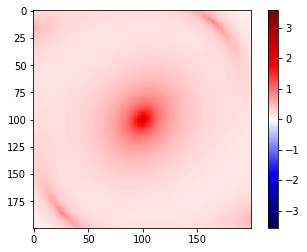

In [5]:
autoshow(img_blank.image)

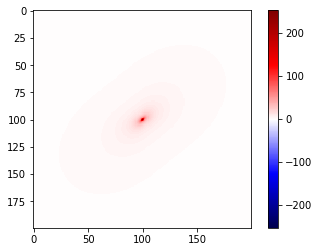

In [6]:
autoshow(img_blank.divmat)

In [8]:
measure_mass(img_blank.divmat/2, zl, zs, ext)

<Quantity 3.27910819e+11 solMass>

In [43]:
# # Now we'll try a random distribution of subhalos
# np.random.seed(123)

# xs, ys, redshifts, masses = [], [], [], []
# for i in range(1):
#     xs.append( np.random.uniform(-ext,ext) )
#     ys.append( np.random.uniform(-ext,ext) )
#     redshifts.append( zl ) 
#     masses.append( 1e8 )

# img_sub = CustomImage(xs,ys,redshifts, m=masses, zl=zl, pixnum=pixnum, pixsize=pixsize)

# autoshow(img_sub.image - img_blank.image, ext=ext)

# img_sub.calc_div_curl();

# autoshow(img_sub.divmat - img_blank.divmat)

# np.sum(img_sub.divmat - img_blank.divmat)

# img_sub2 = CustomImage(xs,ys,redshifts, m=masses, zl=zl, pixnum=pixnum, pixsize=pixsize,
#                       mass_sheets=False)

# img_sub2.calc_div_curl();

# np.sum(img_sub2.divmat - img_blank.divmat)

# autoshow(img_sub2.divmat - img_blank.divmat)

# img_sub.kwargs_lens

In [59]:
xs, ys

([0.3143506969565786], [-0.34217706407939286])

In [9]:
# Now we'll try a random distribution of subhalos
np.random.seed(123)

xs, ys, redshifts, masses = [], [], [], []
for i in range(1):
    xs.append( np.random.uniform(-ext,ext) )
    ys.append( np.random.uniform(-ext,ext) )
    redshifts.append( zl ) 
    masses.append( 1e7 )
    
img_sub = CustomImage(xs,ys,redshifts, m=masses, zl=zl, pixnum=pixnum, pixsize=pixsize,
                     mass_sheets=False)

In [10]:
img_sub.calc_div_curl();

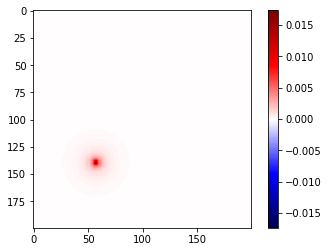

In [11]:
autoshow(img_sub.divmat - img_blank.divmat)

In [12]:
convmat = 0.5 * (img_sub.divmat - img_blank.divmat)

In [12]:
phys_width = 2 * ext * np.pi/648000  * ADD(0, zl).to(u.kpc)
pixsize_phys = phys_width / pixnum
print(phys_width)

9.713163759014881 kpc


In [13]:
np.sum(convmat) * pixsize_phys**2

<Quantity 0.00285308 kpc2>

How much convergence do we expect analytically?

In [14]:
sigma_cr(zl,1).to(u.Msun/u.kpc**2)

<Quantity 3.11654993e+09 solMass / kpc2>

In [15]:
np.sum(convmat) * pixsize_phys**2 * sigma_cr(zl,1).to(u.Msun/u.kpc**2)

<Quantity 8891767.60029102 solMass>

In [16]:
break

SyntaxError: 'break' outside loop (<ipython-input-16-6aaf1f276005>, line 4)

In [17]:
len(convmat)

200

In [8]:
def measure_mass(convmat, zl, zs, ext):
    # measure mass from matrix of convergence
    phys_width = 2*ext* np.pi/648000 * ADD(0, zl).to(u.kpc)
    print('phys width', phys_width)
    pixnum = len(convmat) # might be off by 4 depending on method but whatever
    pixsize_phys = phys_width / pixnum
    twod_integral_conv = np.sum(convmat) * pixsize_phys**2
    return twod_integral_conv * sigma_cr(zl, zs).to(u.Msun/u.kpc**2)    

In [19]:
measure_mass(img_blank.divmat/2, zl, zs, ext)

phys width 9.713163759014881 kpc


<Quantity 3.27910819e+11 solMass>

In [21]:
1.0 * np.pi/648000 * ADD(0, zl).to(u.kpc)

<Quantity 6.07072735 kpc>

*Conclusion*

I was just double-checking to see if the mass-sheet code works, and it appears that the mass of a subhalo is roughly 1.5 times whatever you tell it to be. Is this because we're taking the divergence numerically?

In [52]:
bigimg_blank = CustomImage([],[],[], zl=zl, pixnum=2*pixnum, pixsize=0.5*pixsize)
bigimg_blank.calc_div_curl();

In [53]:
# Now we'll try a random distribution of subhalos
np.random.seed(123)

xs, ys, redshifts, masses = [], [], [], []
for i in range(1):
    xs.append( np.random.uniform(-ext,ext) )
    ys.append( np.random.uniform(-ext,ext) )
    redshifts.append( zl ) 
    masses.append( 1e7 )

bigimg_sub = CustomImage(xs,ys,redshifts, m=masses, zl=zl, pixnum=2*pixnum, pixsize=0.5*pixsize,
                     mass_sheets=False)

new result of alpha_rs is 0.00024212965175405735
old result would have been 0.007274484653964193


In [54]:
bigimg_sub.calc_div_curl()

(array([[0.19180451, 0.1918811 , 0.19230321, ..., 0.36948036, 0.36874428,
         0.36865194],
        [0.1919704 , 0.19204817, 0.1924722 , ..., 0.36986592, 0.36912124,
         0.36902351],
        [0.19251238, 0.19259178, 0.19301815, ..., 0.37098931, 0.37023387,
         0.37012852],
        ...,
        [0.37046874, 0.37058833, 0.37135787, ..., 0.19399781, 0.1935671 ,
         0.1934868 ],
        [0.36937411, 0.36948592, 0.37024464, ..., 0.19344633, 0.19301799,
         0.19293935],
        [0.36901589, 0.36912229, 0.36987249, ..., 0.19327568, 0.1928493 ,
         0.19277185]]),
 array([[-2.96162757e-05, -1.36081602e-04, -1.37878064e-04, ...,
          2.87943542e-04,  2.82927285e-04,  9.55305296e-05],
        [ 1.06367364e-04, -9.99928196e-08, -1.12794371e-07, ...,
          3.77627971e-07,  3.35979550e-07, -1.87071450e-04],
        [ 1.08168464e-04, -8.86866275e-08, -1.01515851e-07, ...,
          3.41307593e-07,  2.99510444e-07, -1.92114766e-04],
        ...,
        [-2.004016

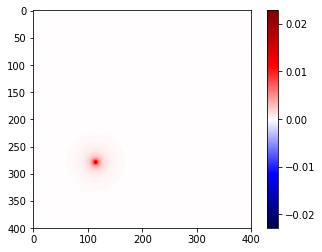

In [55]:
autoshow(bigimg_sub.divmat - bigimg_blank.divmat)

In [56]:
bigconvmat = 0.5*(bigimg_sub.divmat - bigimg_blank.divmat)

In [58]:
np.sum(bigconvmat) * (0.5*pixsize_phys)**2 * sigma_cr(zl,1).to(u.Msun/u.kpc**2)

<Quantity 8891396.15199446 solMass>

No, this seems not to be numeric...

### Comparing mass functions

In [23]:
from scipy.integrate import quad

In [31]:
kappa_hat_sub = .02
area = np.pi * (6.3 * u.kpc)**2 # maybe?
sigcr = sigma_cr(zl, zs).to(u.Msun/u.kpc**2)

In [40]:
def unnorm_mass_func(m):
    mstar = 2.52e7 # solar masses
    return (m/mstar)**-1.9

def unnorm_mass_func_times_m(m):
    return unnorm_mass_func(m) * m

mlow = 10**5
mhigh = 1e8

numerator = quad(unnorm_mass_func_times_m, mlow, mhigh)
print('numerator', numerator)
denominator = quad(unnorm_mass_func, mlow, mhigh)
print('denominator', denominator)
mass_avg = numerator[0] / denominator[0] * u.Msun
print('mass_avg', mass_avg)

Nsub = kappa_hat_sub * area * sigcr / mass_avg
print('Nsub', Nsub)

numerator (3635788298413213.0, 627583.8640232086)
denominator (4050896256.151149, 0.00504684735554406)
mass_avg 897526.8850423882 solMass
Nsub 8659.395785462402


In [41]:
8659/613 # This is offset in Number of subhalos very roughly

14.125611745513867